In [ ]:
from pathlib import Path
import tensorflow as tf
import sys

In [ ]:
project_path = Path(__file__).parent.parent

In [ ]:
sys.path.append(project_path)
from finetune_service import fine_tune

In [ ]:
data_path = Path("data")
model_label = "efficientnetv2"

In [9]:
train_path = data_path / "train.csv"
valid_path = data_path / "valid.csv"
test_path = data_path / "test.csv"

In [10]:
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)
BATCH_SIZE = 32

In [11]:
base_model = tf.keras.applications.EfficientNetV2S(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights="imagenet",
)

base_model_layer_name = base_model.name
last_conv_layer_name = "top_activation"
pre_process = tf.keras.applications.efficientnet_v2.preprocess_input

Found 76410 validated image filenames.
Found 9551 validated image filenames.
Found 9551 validated image filenames.
Start training classifier


2026-01-17 13:08:27.944676: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 90501


299/299 ━━━━━━━━━━━━━━━━━━━━ 72s 209ms/step - auc: 0.4849 - loss: 0.7411
initial loss: 0.74
initial auc: 0.48
Epoch 1/10
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 601s 244ms/step - auc: 0.6344 - loss: 0.4182 - val_auc: 0.6720 - val_loss: 0.4073
Epoch 2/10
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 583s 244ms/step - auc: 0.6548 - loss: 0.4117 - val_auc: 0.6791 - val_loss: 0.4054
Epoch 3/10
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 579s 243ms/step - auc: 0.6577 - loss: 0.4108 - val_auc: 0.6810 - val_loss: 0.4039
Epoch 4/10
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 582s 244ms/step - auc: 0.6580 - loss: 0.4108 - val_auc: 0.6811 - val_loss: 0.4042
Epoch 5/10
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 582s 244ms/step - auc: 0.6586 - loss: 0.4107 - val_auc: 0.6822 - val_loss: 0.4058
Epoch 6/10
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 582s 244ms/step - auc: 0.6595 - loss: 0.4106 - val_auc: 0.6834 - val_loss: 0.4030
Epoch 7/10
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 582s 244ms/step - auc: 0.6606 - loss: 0.4105 - val_auc: 0.6833 - val_loss: 0.4047
Epoch 8/10
2388/2388 ━

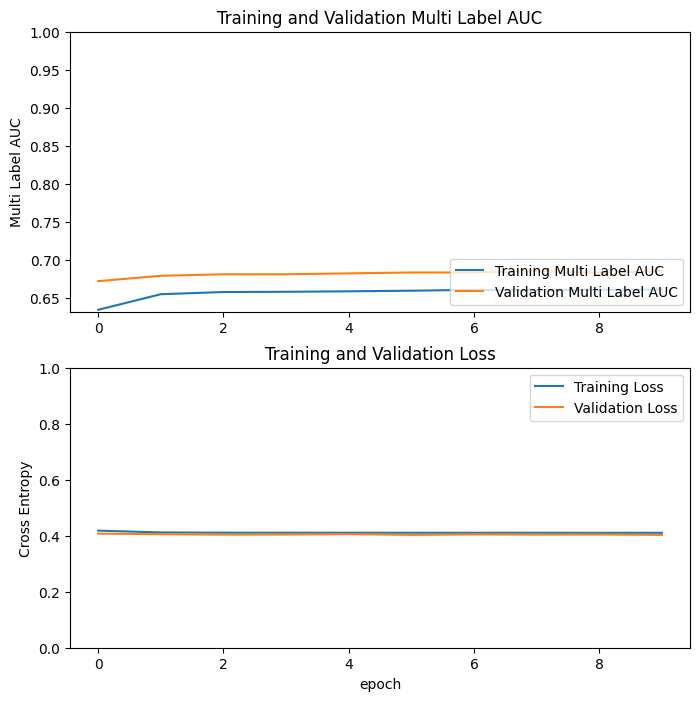

Let's select the best checkpoint based on multi label auc:
model_epoch_01.keras      | Test: 0.6749 | Val: 0.6720 | Gap: -0.0029
model_epoch_02.keras      | Test: 0.6813 | Val: 0.6791 | Gap: -0.0022
model_epoch_03.keras      | Test: 0.6829 | Val: 0.6810 | Gap: -0.0019
model_epoch_04.keras      | Test: 0.6814 | Val: 0.6811 | Gap: -0.0003
model_epoch_05.keras      | Test: 0.6841 | Val: 0.6822 | Gap: -0.0019
model_epoch_06.keras      | Test: 0.6858 | Val: 0.6834 | Gap: -0.0024
model_epoch_07.keras      | Test: 0.6847 | Val: 0.6833 | Gap: -0.0014
model_epoch_08.keras      | Test: 0.6859 | Val: 0.6852 | Gap: -0.0007
model_epoch_09.keras      | Test: 0.6844 | Val: 0.6831 | Gap: -0.0014
model_epoch_10.keras      | Test: 0.6848 | Val: 0.6853 | Gap: 0.0006

Best checkpoint: model_epoch_08.keras with test multi label auc = 0.6859
Start finetuning classifier
Number of layers in the base model:  513
Number of trainable variables in the model:  99
Epoch 11/20


E0000 00:00:1768662568.923995    1032 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_1_1/efficientnetv2-s_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


2388/2388 ━━━━━━━━━━━━━━━━━━━━ 808s 326ms/step - auc: 0.6925 - loss: 0.3970 - val_auc: 0.7300 - val_loss: 0.3801
Epoch 12/20
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 773s 324ms/step - auc: 0.7277 - loss: 0.3802 - val_auc: 0.7418 - val_loss: 0.3748
Epoch 13/20
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 774s 324ms/step - auc: 0.7420 - loss: 0.3733 - val_auc: 0.7495 - val_loss: 0.3711
Epoch 14/20
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 776s 325ms/step - auc: 0.7527 - loss: 0.3681 - val_auc: 0.7527 - val_loss: 0.3693
Epoch 15/20
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 774s 324ms/step - auc: 0.7610 - loss: 0.3637 - val_auc: 0.7543 - val_loss: 0.3685
Epoch 16/20
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 773s 324ms/step - auc: 0.7693 - loss: 0.3596 - val_auc: 0.7554 - val_loss: 0.3692
Epoch 17/20
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 773s 324ms/step - auc: 0.7759 - loss: 0.3560 - val_auc: 0.7527 - val_loss: 0.3718
Epoch 18/20
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 774s 324ms/step - auc: 0.7834 - loss: 0.3519 - val_auc: 0.7544 - val_loss: 0.3716
Epoch 19/20


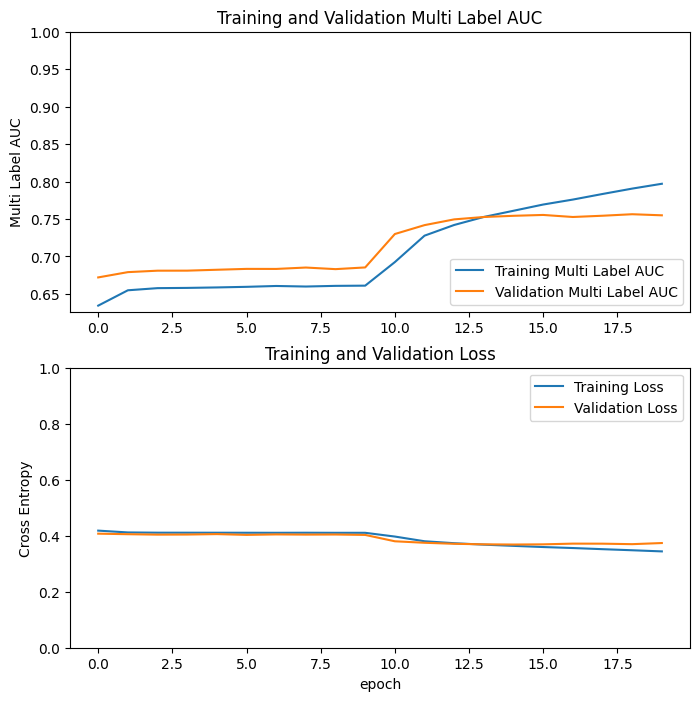

Let's select the best checkpoint based on multi label auc:
model_epoch_11.keras      | Test: 0.7332 | Val: 0.7300 | Gap: -0.0033
model_epoch_12.keras      | Test: 0.7445 | Val: 0.7418 | Gap: -0.0027
model_epoch_13.keras      | Test: 0.7522 | Val: 0.7495 | Gap: -0.0027
model_epoch_14.keras      | Test: 0.7545 | Val: 0.7527 | Gap: -0.0018
model_epoch_15.keras      | Test: 0.7563 | Val: 0.7543 | Gap: -0.0021
model_epoch_16.keras      | Test: 0.7571 | Val: 0.7554 | Gap: -0.0017
model_epoch_17.keras      | Test: 0.7568 | Val: 0.7527 | Gap: -0.0041
model_epoch_18.keras      | Test: 0.7587 | Val: 0.7544 | Gap: -0.0043
model_epoch_19.keras      | Test: 0.7592 | Val: 0.7564 | Gap: -0.0029
model_epoch_20.keras      | Test: 0.7595 | Val: 0.7549 | Gap: -0.0046

Best checkpoint: model_epoch_20.keras with test multi label auc = 0.7595
299/299 ━━━━━━━━━━━━━━━━━━━━ 68s 214ms/step
Individual auc for each pathology:
No Finding: AUC = 0.8652
Enlarged Cardiomediastinum: AUC = 0.6076
Cardiomegaly: AUC = 0.

In [12]:
fine_tune(
    train_path=train_path,
    val_path=valid_path,
    test_path=test_path,
    batch_size=BATCH_SIZE,
    img_size=IMG_SIZE,
    base_model=base_model,
    base_model_layer_name=base_model_layer_name,
    pre_process=pre_process,
    dropout=0.3,
    lr_classifier=10e-4,
    epochs_classifier=10,
    cp_path=project_path / "models" / model_label / "cp",
    fine_tune_at=400,
    lr_finetune=10e-5,
    epochs_finetune=10,
    model_save_path=project_path / "models" / model_label,
    last_conv_layer_name=last_conv_layer_name,
)